# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from selenium import webdriver
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
driver_path = r'C:\Driver\chromedriver.exe'
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\faulk\AppData\Local\Temp\ipykernel_32060\3458727845.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
headers = [header.get_text(strip=True) for header in table.find_all('th')]
print("Headers:", headers)

rows = []
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    row_data = [col.get_text(strip=True) for col in columns]
    rows.append(row_data)
print('Rows:',rows)

Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Rows: [['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=headers)


In [7]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
df['terrestrial_date']=df['terrestrial_date'].astype('datetime64[ns]')
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

In [10]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
months_num = len(df['month'].unique())
months_num

12

In [12]:
# 2. How many sols (Martian days) worth of data are there?
sol_num = len(df['sol'])
sol_num

1867

In [13]:
# 3. What is the average minimum temperature by month?
avg_temp_per_month = df.groupby('month')['min_temp'].mean()
avg_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

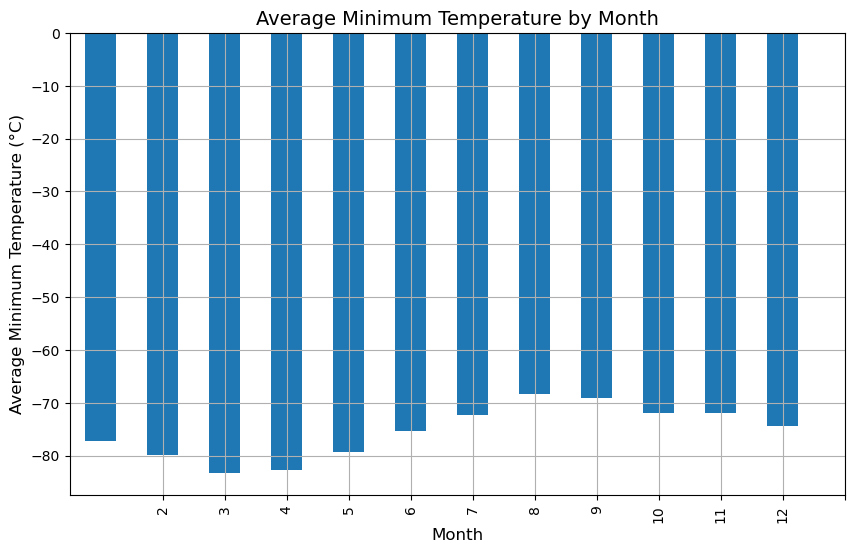

In [16]:
# Plot the average minimum temperature by month
avg_temp_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Temperature by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

Coldest Month: Month 3 with an average temperature of -83.31°C
Hottest Month: Month 8 with an average temperature of -68.38°C


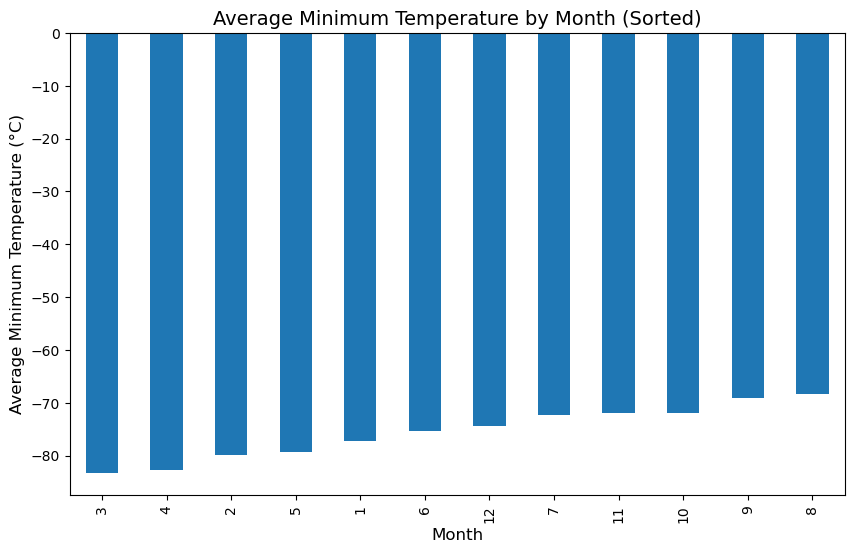

In [21]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_temp_per_month.sort_values()
coldest_month = sorted_avg_temp.idxmin()
hottest_month = sorted_avg_temp.idxmax()
sorted_avg_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Temperature by Month (Sorted)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)
print(f"Coldest Month: Month {coldest_month} with an average temperature of {sorted_avg_temp[coldest_month]:.2f}°C")
print(f"Hottest Month: Month {hottest_month} with an average temperature of {sorted_avg_temp[hottest_month]:.2f}°C")


In [19]:
# 4. What is the average pressure by month?
avg_pressure_per_month = df.groupby('month')['pressure'].mean()
print(avg_pressure_per_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0, 0.5, 'Average Pressure (Pa)')

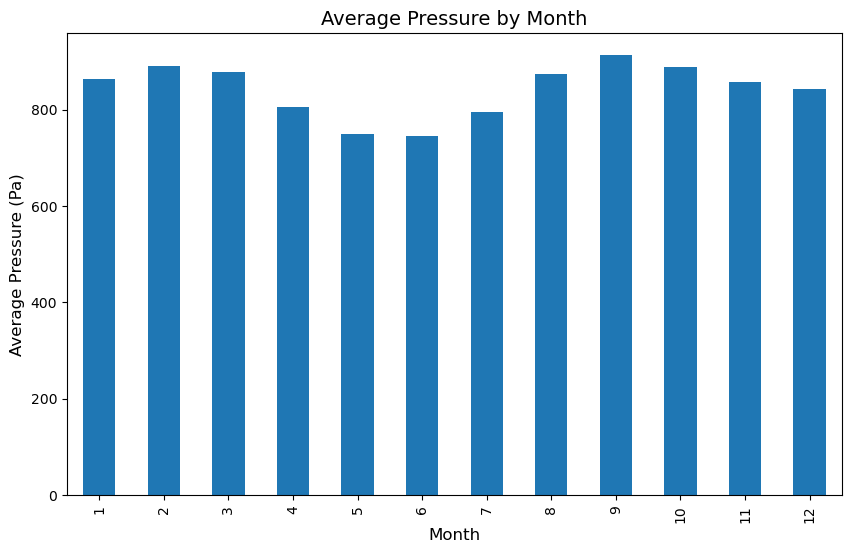

In [20]:
# Plot the average pressure by month
avg_pressure_per_month = df.groupby('month')['pressure'].mean()
avg_pressure_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pressure by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

Month with Lowest Pressure: Month 6 with an average pressure of 745.05 Pa
Month with Highest Pressure: Month 9 with an average pressure of 913.31 Pa


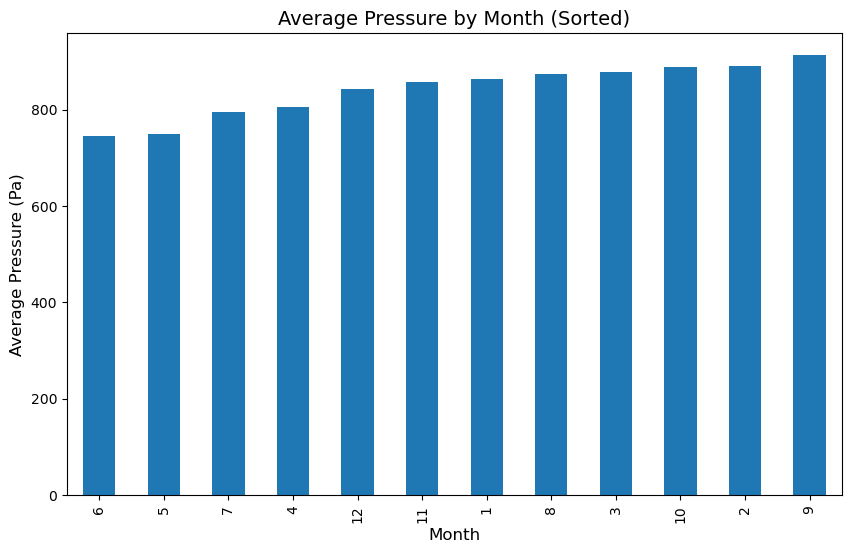

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_per_month.sort_values()
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pressure by Month (Sorted)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)
print(f"Month with Lowest Pressure: Month {lowest_pressure_month} with an average pressure of {sorted_avg_pressure[lowest_pressure_month]:.2f} Pa")
print(f"Month with Highest Pressure: Month {highest_pressure_month} with an average pressure of {sorted_avg_pressure[highest_pressure_month]:.2f} Pa")


Text(0, 0.5, 'Minimum Temperature (°C)')

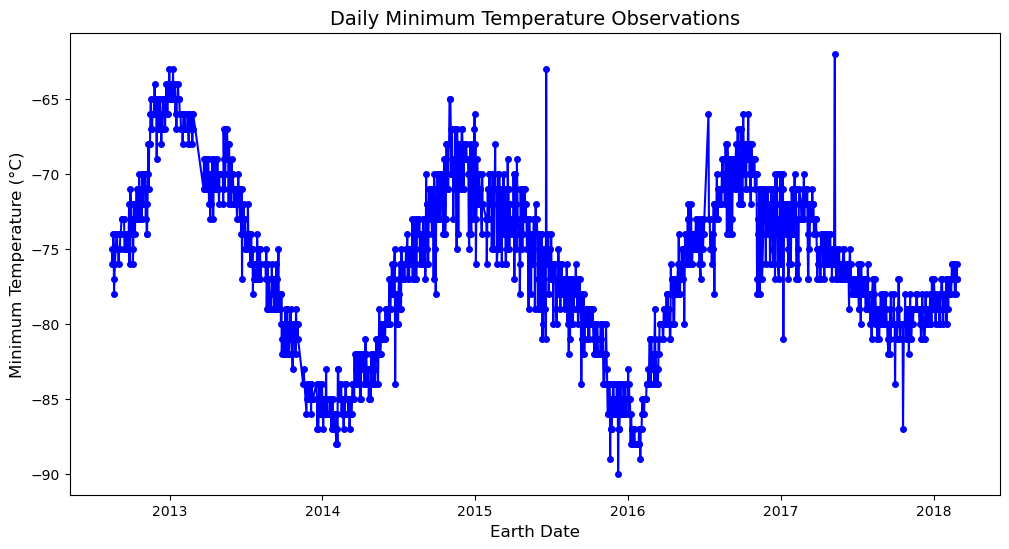

In [25]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', marker='o', linestyle='-', markersize=4)
plt.title('Daily Minimum Temperature Observations', fontsize=14)
plt.xlabel('Earth Date', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
df.to_csv('curiosity_data.csv', index=False)

In [27]:
driver.quit()